In [10]:
import torch
import torch.nn as nn

class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=2, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text);
        _, (hidden, _) = self.rnn(embedded);
        
        final_hidden = hidden[-1] # last hidden state
        return self.fc(final_hidden)


In [12]:
vocab_size = 10000  
embedding_dim = 100
hidden_dim = 256
output_dim = 2

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)

model


TextClassifier(
  (embedding): Embedding(10000, 100)
  (rnn): LSTM(100, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=2, bias=True)
)

In [15]:
# creando tensores


import torch

tensor = torch.tensor(1)

print(tensor.dtype)

print(tensor.shape)

print(tensor)

torch.int64
torch.Size([])
tensor(1)


In [21]:
import torch

tensor = torch.rand(1, 10)

print(tensor.dtype)

print(tensor.shape)

print(tensor)

torch.float32
torch.Size([1, 10])
tensor([[0.7808, 0.7576, 0.7492, 0.3908, 0.4586, 0.1993, 0.3555, 0.5784, 0.3436,
         0.2932]])


In [22]:
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [25]:
t5 = torch.rand(5, 2, 3)

print(t5)

tensor([[[0.9239, 0.5155, 0.9651],
         [0.1051, 0.9068, 0.4198]],

        [[0.2857, 0.9258, 0.8495],
         [0.0712, 0.7014, 0.3473]],

        [[0.5781, 0.4485, 0.0236],
         [0.2787, 0.5945, 0.8008]],

        [[0.6231, 0.9889, 0.6302],
         [0.5974, 0.9942, 0.6603]],

        [[0.2654, 0.5457, 0.8290],
         [0.7395, 0.3122, 0.3280]]])


In [33]:
torch.tensor([[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])


tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

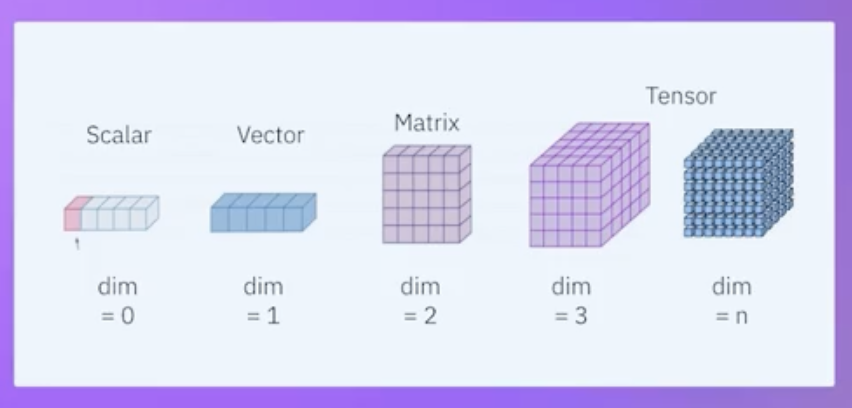

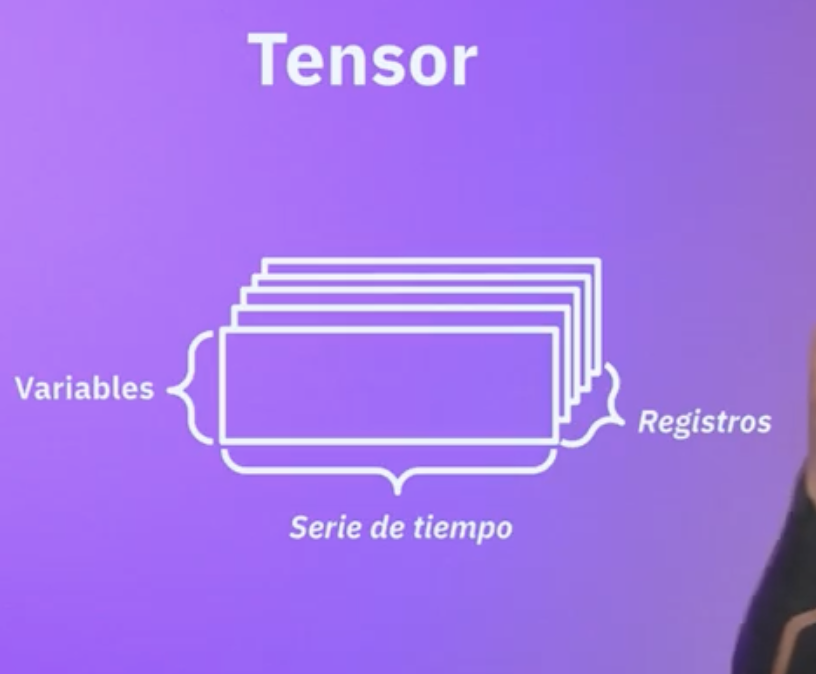

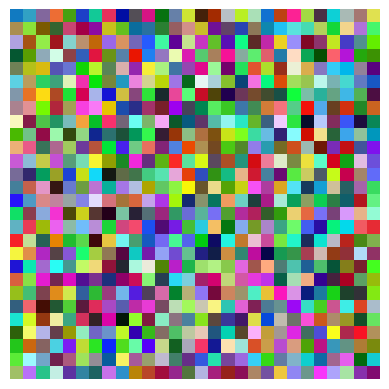

In [43]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Generate random image tensor
image_rgb = torch.rand(2, 3, 28, 28)

# Select the first image from the batch and scale it to 0-255 range
first_image = image_rgb[0] * 255
first_image = first_image.to(torch.uint8)

# Convert the tensor to a PIL image
to_pil = transforms.ToPILImage()
pil_image = to_pil(first_image)

# Display the image using matplotlib
plt.imshow(pil_image)
plt.axis('off')  # Hide axes for better viewing
plt.show()

In [52]:
t = torch.tensor([1, 2, 3.2])
t2 = torch.tensor([1, 2, 3])

print(t.dtype)
print(t2.dtype)

t3 = t * t2

print(t3)
print(t3.dtype)

# change t3 dtype to int
t3 = t3.to(torch.int32)

print(t3)
print(t3.dtype)

print(t3.device)

torch.float32
torch.int64
tensor([1.0000, 4.0000, 9.6000])
torch.float32
tensor([1, 4, 9], dtype=torch.int32)
torch.int32
cpu


In [53]:
torch.cuda.is_available()

False

In [55]:
print(torch.backends.mps.is_available())

print(torch.backends.mps.is_built())

True
True


In [56]:
import numpy as np

vector = np.ones(10)

tensor = torch.from_numpy(vector)

print(tensor)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)


In [57]:
# operaciones con tensores

zeros_tensor = torch.zeros(3, 4)

ones_tensor = torch.ones(3, 4)

random_tensor = torch.rand(3, 4)

In [61]:
added_tensor = zeros_tensor + ones_tensor

print(added_tensor)

subtracted_tensor = random_tensor - ones_tensor

print(subtracted_tensor)

multiplied_tensor = random_tensor * 2

print(multiplied_tensor)

divided_tensor = random_tensor / 2

print(divided_tensor)


tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[-0.6253, -0.1780, -0.3624, -0.5183],
        [-0.2063, -0.1393, -0.9084, -0.4525],
        [-0.4060, -0.9868, -0.9708, -0.8277]])
tensor([[0.7494, 1.6440, 1.2752, 0.9635],
        [1.5873, 1.7214, 0.1833, 1.0949],
        [1.1880, 0.0265, 0.0585, 0.3447]])
tensor([[0.1873, 0.4110, 0.3188, 0.2409],
        [0.3968, 0.4304, 0.0458, 0.2737],
        [0.2970, 0.0066, 0.0146, 0.0862]])


In [65]:
matrix1 = torch.rand(2, 3)
matrix2 = torch.rand(3, 2)

print(matrix1)
print(matrix2)

matrix_product = matrix1 @ matrix2 # matrix multiplication
matrix_product2 = torch.matmul(matrix1, matrix2)

print(matrix_product)

print(matrix_product2)

tensor([[0.3263, 0.9645, 0.8617],
        [0.0221, 0.8327, 0.2103]])
tensor([[0.2679, 0.2509],
        [0.0779, 0.1348],
        [0.1173, 0.1433]])
tensor([[0.2636, 0.3354],
        [0.0954, 0.1480]])
tensor([[0.2636, 0.3354],
        [0.0954, 0.1480]])
